In [1]:
import pandas as pd
# Make display smaller
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('dataset/users.dat', sep='::',
 header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('dataset/ratings.dat', sep='::',
 header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('dataset/movies.dat', sep='::',
 header=None, names=mnames)






C:\Users\BIT\anaconda3\envs\data-anal-env\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\BIT\anaconda3\envs\data-anal-env\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\BIT\anaconda3\envs\data-anal-env\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyth

In [2]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [3]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [6]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [7]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
# values와 column은 엄연히 다른 의미
# values는 계산된 column중에 특정 부분만 가져오고 column은 계산할 항목을 아예 정하는 것
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [8]:

pd.set_option('display.max_rows', 500)

data.head(500)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [9]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [10]:
ratings_by_title.index[ratings_by_title < 40]

Index(['$1,000,000 Duck (1971)', '1-900 (1994)',
       '24 7: Twenty Four Seven (1997)', '24-hour Woman (1998)',
       '3 Strikes (2000)', '301, 302 (1995)', 'A Chef in Love (1996)',
       'Abominable Snowman, The (1957)', 'About Adam (2000)',
       'Acid House, The (1998)',
       ...
       'X: The Unknown (1956)', 'Yankee Zulu (1994)',
       'Year My Voice Broke, The (1987)', 'Year of the Horse (1997)',
       'You So Crazy (1994)', 'Young and Innocent (1937)', 'Zachariah (1971)',
       'Zed & Two Noughts, A (1985)',
       'Zero Kelvin (Kj�rlighetens kj�tere) (1995)',
       'Zeus and Roxanne (1997)'],
      dtype='object', name='title', length=1033)

In [11]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [12]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [13]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [14]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')

sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [15]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [16]:
data['rating']

0          5
1          5
2          4
3          4
4          5
          ..
1000204    5
1000205    3
1000206    1
1000207    5
1000208    4
Name: rating, Length: 1000209, dtype: int64

In [17]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [18]:
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [19]:
names1880 = pd.read_csv('dataset/yob1880.txt',names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [20]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [21]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'dataset/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [32]:
new_table = names[names['year']==1880]
new_table

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1995,Woodie,M,5,1880,0.000045
1996,Worthy,M,5,1880,0.000045
1997,Wright,M,5,1880,0.000045
1998,York,M,5,1880,0.000045


In [34]:
result = np.sum(new_table['births'])
result

201486

In [35]:
90993+110493

201486

In [37]:
man_table = new_table[new_table['sex']=='F']
np.sum(man_table['births'])

90993

In [22]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

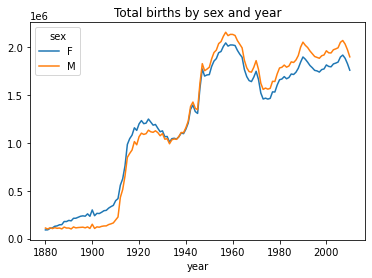

In [23]:
import matplotlib.pyplot as plt
total_births.plot(title='Total births by sex and year')

In [24]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [25]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
1895  F      1.0
      M      1.0
1896  F      1.0
      M      1.0
1897  F      1.0
      M      1.0
1898  F      1.0
      M      1.0
1899  F      1.0
      M      1.0
1900  F      1.0
      M      1.0
1901  F      1.0
      M      1.0
1902  F      1.0
      M      1.0
1903  F      1.0
      M      1.0
1904  F      1.0
      M      1.0
1905  F      1.0
      M      1.0
1906  F      1.0
      M      1.0
1907  F      1.0
      M      1.0
1908  F      1.0
      M      1.0
1909

In [41]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)
top1000[top1000['year']==1881]

,name,sex,births,year,prop
1942,Mary,F,6919,1881,0.075243
1943,Anna,F,2698,1881,0.029340
1944,Emma,F,2034,1881,0.022120
1945,Elizabeth,F,1852,1881,0.020140
1946,Margaret,F,1658,1881,0.018031
...,...,...,...,...,...
3872,Ebb,M,5,1881,0.000050
3873,Duke,M,5,1881,0.000050
3874,Dolphus,M,5,1881,0.000050
3875,Dennie,M,5,1881,0.000050


In [38]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)
total_births['Mary']

year
1880     7092.0
1881     6948.0
1882     8179.0
1883     8044.0
1884     9253.0
1885     9166.0
1886     9923.0
1887     9935.0
1888    11804.0
1889    11690.0
1890    12113.0
1891    11743.0
1892    13224.0
1893    12839.0
1894    13199.0
1895    13493.0
1896    13868.0
1897    13475.0
1898    14456.0
1899    13222.0
1900    16785.0
1901    13195.0
1902    14541.0
1903    14338.0
1904    15020.0
1905    16135.0
1906    16447.0
1907    17649.0
1908    18743.0
1909    19336.0
1910    22939.0
1911    24483.0
1912    32413.0
1913    36756.0
1914    45468.0
1915    58343.0
1916    61592.0
1917    64429.0
1918    67544.0
1919    65994.0
1920    71168.0
1921    74168.0
1922    72342.0
1923    71839.0
1924    73728.0
1925    70855.0
1926    68101.0
1927    70875.0
1928    67161.0
1929    63829.0
1930    64452.0
1931    60627.0
1932    60191.0
1933    55793.0
1934    57201.0
1935    55331.0
1936    54649.0
1937    55923.0
1938    56483.0
1939    55174.0
1940    56506.0
1941    58340.0
194

In [28]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

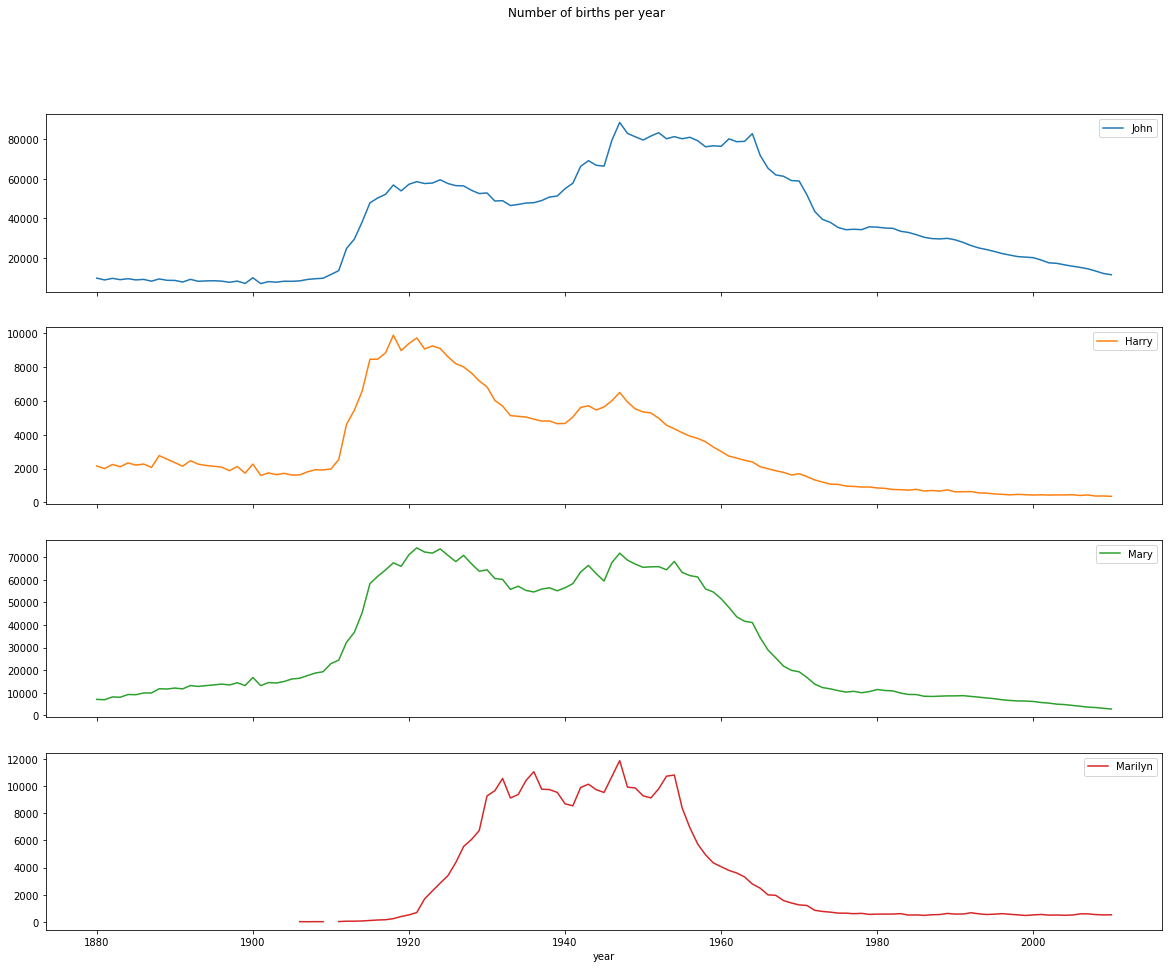

In [29]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(20, 15), grid=False, title="Number of births per year")

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

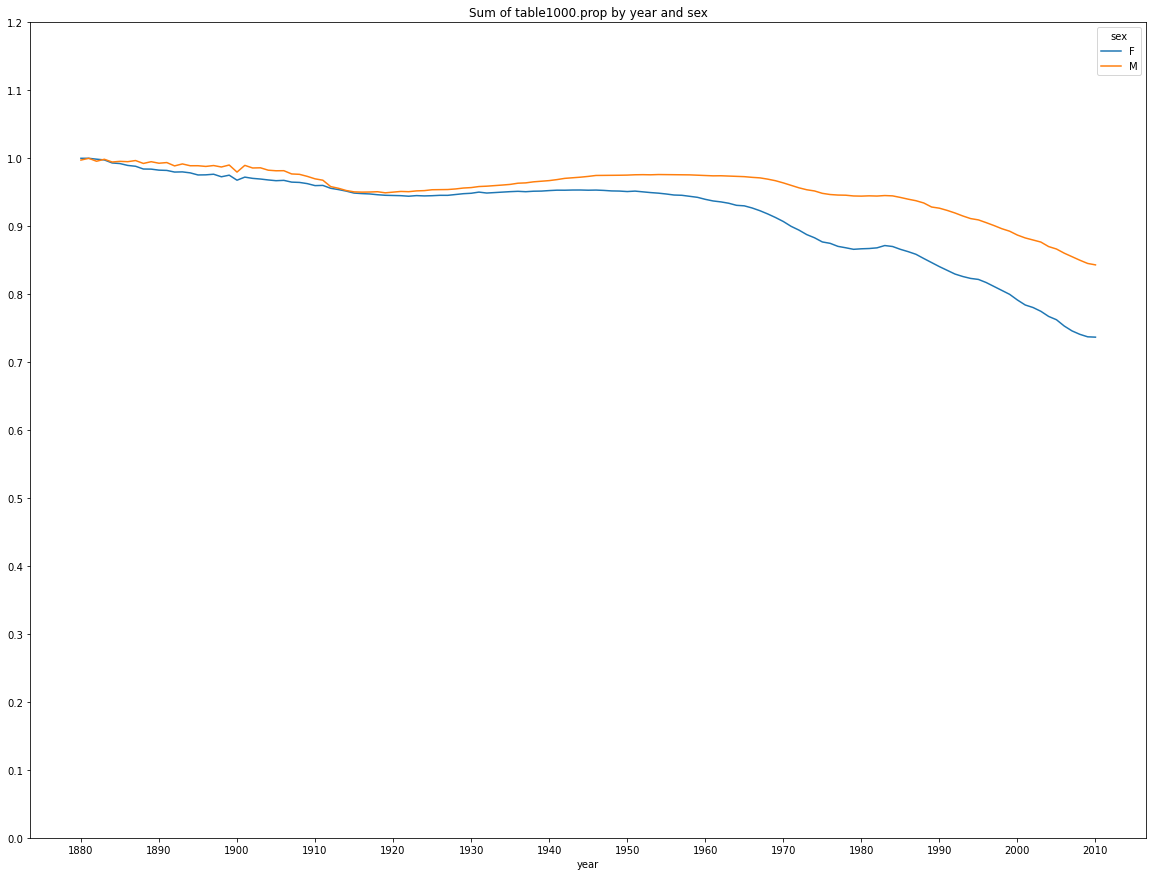

In [30]:
import numpy as np

table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10), figsize=(20, 15))

In [45]:
import numpy as np
array = [75,80,85,90,95]
np.std(array)


7.0710678118654755

In [47]:
u = [2, 2]
v = [1, 2]
z = [-3, 5]

result = [sum(i) for i in zip(u,v,z)]
result

[0, 9]

In [49]:
matrix_a =[[1, 2, 3], [4, 5, 6]]
result = [list(x) for x in zip(*matrix_a)]
result

[[1, 4], [2, 5], [3, 6]]

In [50]:
matrix_a = [[1, 1, 2], [2, 1, 1]]
matrix_b = [[1, 1], [2, 1], [1, 3]]


          
result = [[sum(a*b for a, b in zip(row_a, column_b)) for column_b in zip(*matrix_b)] for row_a in matrix_a]
result

[[5, 8], [5, 6]]

In [55]:
import math
array = [75,80,85,90,95]
# 평균 구하기
mean_value = sum(array)/len(array)
# 분산 구하기
var_sum = 0
for value in array:
    var_sum+=((value - mean_value) ** 2)
var_value = var_sum / len(array)
# 표준 편차
std_value = math.sqrt(var_value)
std_value




7.0710678118654755

In [56]:
from string import ascii_uppercase
def solution(msg):
    answer = []
    # 색인번호 리스트
    index_list=list(range(1,27))
    # 알파벳 리스트
    alpha_list = list(ascii_uppercase)
    # 색인번호와 알파벳을 담을 딕셔너리 생성
    information_dict = {}
    
    for index, alpha in zip(index_list,alpha_list):
        information_dict[alpha] = index
    
    # 사전에 입력된 단어들을 저장한다.    
    msg_list = list(msg)
    dict_number=26
    new_string=''
    first_string=''
    
    for i in range(len(msg_list)-1):
        if new_string=='':
            first_string = msg_list[i]
        else:
            # 사전에 있는 가장 긴 문자열을 구해야함
            first_string=new_string
            
        second_string=msg_list[i+1]
        
        # 사전에 단어가 있는지 조회
        result_string=first_string+second_string
        print(first_string)
        if result_string in information_dict:
            pass
        else:
            # 단어가 없으면 추가한 후 색인번호 추가
            dict_number+=1
            information_dict[result_string]=dict_number
            answer.append(information_dict[first_string])
            # new_string은 초기화된다.
            new_string=''
            
        print(information_dict)
            
    
    #for문에 포함되지 않은 마지막 색인번호 추가       
    answer.append(information_dict[first_string])
            

    return answer

[20, 15, 2, 5, 18, 14, 27, 29, 31, 36, 30, 32, 34]


In [57]:
a = np.arange(1, 10)
print(a)

[1 2 3 4 5 6 7 8 9]


In [58]:
a = np.arange(12).reshape(4, 3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [60]:
a = np.linspace(1, 10, 10)
print(a)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [61]:
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [62]:
a = np.arange(1, 6)
print(a.cumprod())

[  1   2   6  24 120]


In [63]:
a = np.array([0, 1, 2, 3]).reshape(2, 2)
print(a.transpose())

[[0 2]
 [1 3]]


In [64]:
s1 = pd.Series([10, 20, 30, 40, 50])
print(s1)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [65]:
s = pd.Series({'국어':100, '영어':95, '수학':100})
print(s)

국어    100
영어     95
수학    100
dtype: int64


In [66]:
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
index_date = pd.date_range('2020-05-01', periods=4)
columns_list = ['A', 'B', 'C']
df = pd.DataFrame(data, index=index_date, columns=columns_list)
print(df)

             A   B   C
2020-05-01   1   2   3
2020-05-02   4   5   6
2020-05-03   7   8   9
2020-05-04  10  11  12


In [67]:
df_left = pd.DataFrame({'key':['A','B','C'], 'left': [1, 2, 3]})
df_right = pd.DataFrame({'key':['A','B','D'], 'right': [4, 5, 6]})
print(df_left.merge(df_right, how='outer', on = 'key'))

  key  left  right
0   A   1.0    4.0
1   B   2.0    5.0
2   C   3.0    NaN
3   D   NaN    6.0


In [68]:
f = lambda n, m: n if n%2 == 0 else m
print(f(2, 3))

2


In [75]:
from string import ascii_uppercase
def solution(msg):
    answer = []
    # 색인번호 리스트
    index_list=list(range(1,27))
    # 알파벳 리스트
    alpha_list = list(ascii_uppercase)
    # 색인번호와 알파벳을 담을 딕셔너리 생성
    information_dict = {}
    
    for index, alpha in zip(index_list,alpha_list):
        information_dict[alpha] = index
    
    # 사전에 입력된 단어들을 저장한다.    
    msg_list = list(msg)
    dict_number=26
    new_string=''
    first_string=''
    
    for i in range(len(msg_list)-1):
        if new_string=='':
            first_string = msg_list[i]
        else:
            # 사전에 있는 가장 긴 문자열을 구해야함
            first_string=new_string
            
        second_string=msg_list[i+1]
        
        # 사전에 단어가 있는지 조회
        new_string=first_string+second_string
        if new_string in information_dict:
            pass
        else:
            # 단어가 없으면 추가한 후 색인번호 추가
            dict_number+=1
            information_dict[new_string]=dict_number
            answer.append(information_dict[first_string])
            # new_string은 초기화된다.
            new_string=''
            
            
    
    #for문에 포함되지 않은 마지막 색인번호 추가       
    answer.append(information_dict[first_string])
    
    return answer
            

print(solution(	"TOBEORNOTTOBEORTOBEORNOT"))

[20, 15, 2, 5, 15, 18, 14, 15, 20, 27, 29, 31, 36, 30, 32, 15]


In [2]:
import math
def solution(str1, str2):
    answer = 0
    # 대소문자를 구분하지 않으므로 새로운 소문자 변수 생성
    new_str1, new_str2 = str1.lower(), str2.lower()
    # 다중집합 원소를 담을 리스트 2개 생성
    str1_list, str2_list = [], []
    # while로 순차적 탐색
    start_num=0
    while start_num<=len(new_str1)-1:
        first_str = new_str1[start_num]
        second_str = new_str1[start_num+1]
        result_str = first_str+second_str
        print(result_str)
        # result_str이 조건에 만족하는지 체크
        if result_str.isalpha():
            str1_list.append(result_str)
            start_num+=1
        else:
            start_num+=2
    # while로 순차적 탐색
    start_num=0       
    while start_num<=len(new_str2)-1:
        first_str = new_str2[start_num]
        second_str = new_str2[start_num+1]
        result_str = first_str+second_str
        # result_str이 조건에 만족하는지 체크
        if result_str.isalpha():
            str2_list.append(result_str)
            start_num+=1
        else:
            start_num+=2
    # 둘중 하나가 공집합이면 계산할 필요 없음
    if not str1_list or not str2_list:
        answer=65536
    else:
        # 두 리스트 중에서 길이가 작은 것으로 교집합을 구함
        if len(str1_list)<=len(str2_list):
            common_list = [x for x in str1_list if x in str2_list]
        else:
            common_list = [x for x in str2_list if x in str1_list]
        # 교집합이 없으면 계산하나 마나    
        if len(common_list)==0:
            answer=65536
        else:
            num1 = len(common_list)
            num2 = len(str1_list)+len(str2_list)-len(common_list)
            answer = math.floor((num1/num2)*65536)

    return answer

print(solution('FRANCE','french'))

fr
ra
an
nc
ce


IndexError: string index out of range

In [4]:
array = ["12","123","1235","567","88"]
print(array[0].startswith(array[1:]))

TypeError: startswith first arg must be str or a tuple of str, not list

In [55]:
tuple_array = tuple(array[1:])
print(tuple_array)
'56' in tuple_array
print('12'.startswith(tuple_array))
print('123'.startswith('12'))
print(tuple_array.startswith('12'))

('123', '1235', '567', '88')
False
True


AttributeError: 'tuple' object has no attribute 'startswith'